In [66]:
# Importing the modules
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Getting the list of csv

In [67]:
glob('../data/*.csv')

['../data\\dengue_features_test.csv',
 '../data\\dengue_features_train.csv',
 '../data\\dengue_labels_train.csv']

### Reading the Dataset

In [68]:
dengue_features = pd.read_csv('../data/dengue_features_train.csv')
dengue_labels = pd.read_csv('../data/dengue_labels_train.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue Features' + '{:>11} {:>8}'.format(dengue_features.shape[0], dengue_features.shape[1]))

print('Dengue Labels' + '{:>13} {:>8}'.format(dengue_labels.shape[0], dengue_labels.shape[1]))

                      Rows     Columns
Dengue Features       1456       24
Dengue Labels         1456        4


In [69]:
dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [70]:
dengue_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### Custimizing the plot

In [71]:
plt.style.use('seaborn') # Setting plot style

plt.rcParams['figure.figsize'] = [10, 8] # Setting plot size

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

### Finding the year that has maximum cases of dengue

In [ ]:
year_max_cases = dengue_labels.groupby(['year'])['total_cases'].agg('sum')

#Visualizing it
year_max_cases.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.yticks(np.arange(0,7500, step=500))
plt.show()

So, Year 1994 faced maximum cases of dengue

### City that has maximum cases of dengue

In [ ]:
city_affected = dengue_labels.groupby(['city'])['total_cases'].agg('sum')

city_affected.plot(kind='bar')
plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('City')
plt.ylabel('Total Cases of Dengue')
plt.show()

**sj -> SanJuan** has maximum cases of dengue

## Data Preprocessing

### 1. Checking null entries

In [72]:
dengue_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [73]:
# Checking columns having null values
dengue_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [74]:
# Getting the list of columns having missing values
x = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()
x

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [75]:
# Filling the missing value with mean
for i in x:
    dengue_features[i] = dengue_features[i].fillna(dengue_features[i].mean())

#### Converting all the temperatures from Kelvin to Centigrade

In [76]:
temperature_kelvin_columns = [i for i in dengue_features.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k']

In [77]:
for i in temperature_kelvin_columns:
    dengue_features[i] = dengue_features[i] - 273.15

In [78]:
# Changing the column names from _temp_k to _temp_c
dengue_features.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_features.columns if i.find('_temp_k')]

### 2. Rounding every value upto 3 decimal places

In [79]:
dengue_features = dengue_features.round(3)

dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.123,0.104,0.198,0.178,12.42,24.423,...,32.00,73.366,12.42,14.013,2.629,25.443,6.900,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.170,0.142,0.162,0.155,22.82,25.061,...,17.94,77.369,22.82,15.373,2.371,26.714,6.371,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032,0.173,0.157,0.171,34.54,25.631,...,26.10,82.053,34.54,16.849,2.300,26.714,6.486,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.129,0.245,0.228,0.236,15.36,25.837,...,13.90,80.337,15.36,16.673,2.429,27.471,6.771,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196,0.262,0.251,0.247,7.52,26.369,...,12.20,80.460,7.52,17.210,3.014,28.943,9.371,35.0,23.9,5.8


#### Combining station_max_temp_c and station_min_temp_c as `avg_station_max_min`

In [80]:
dengue_features['avg_station_max_min'] = (dengue_features['station_max_temp_c'] + 
                                          dengue_features['station_min_temp_c']) / 2

dengue_features['avg_station_max_min'].head()

0    24.70
1    26.95
2    27.50
3    28.30
4    29.45
Name: avg_station_max_min, dtype: float64

#### Combining reanalysis_max_air_temp_c and reanalysis_min_air_temp_c as `avg_analysis_max_min`

In [81]:
dengue_features['avg_analysis_max_min'] = (dengue_features['reanalysis_max_air_temp_c'] + 
                                           dengue_features['reanalysis_min_air_temp_c']) / 2

dengue_features['avg_analysis_max_min'].head()

0    24.70
1    25.50
2    25.75
3    26.05
4    26.55
Name: avg_analysis_max_min, dtype: float64

In [82]:
# Adding total cases
dengue_features['total_cases'] = dengue_labels['total_cases']

In [83]:
# Summary statistics
dengue_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142249,0.130568,0.203781,0.202295,45.760385,25.551865,26.075588,22.096353,...,16.746426,4.903755,27.185795,8.059324,32.452431,22.102148,39.326354,27.277290,26.423132,24.675137
std,5.408314,15.019437,0.130830,0.117844,0.073299,0.083268,43.519806,1.357720,1.257382,1.522545,...,1.537181,3.534244,1.273107,2.096867,1.945806,1.566475,47.095179,1.331498,1.325096,43.596000
min,1990.000000,1.000000,-0.406000,-0.456000,-0.016000,-0.063000,0.000000,21.486000,21.743000,16.493000,...,11.716000,1.357000,21.400000,4.529000,26.700000,14.700000,0.000000,22.800000,22.650000,0.000000
25%,1997.000000,13.750000,0.055750,0.051000,0.156000,0.145000,9.960000,24.515250,25.114000,20.980500,...,15.561000,2.329000,26.329000,6.529000,31.100000,21.100000,8.850000,26.400000,25.400000,5.000000
50%,2002.000000,26.500000,0.142000,0.128000,0.197000,0.191000,38.710000,25.512000,26.117500,22.476000,...,17.065000,2.864000,27.386000,7.386000,32.800000,22.200000,24.450000,27.500000,26.500000,12.000000
75%,2005.000000,39.250000,0.229250,0.212250,0.247000,0.246250,70.047500,26.677500,27.057000,23.306250,...,17.974500,7.553750,28.129000,9.500000,33.900000,23.300000,53.600000,28.300000,27.400000,28.000000
max,2010.000000,53.000000,0.508000,0.454000,0.538000,0.546000,390.600000,29.050000,29.779000,25.300000,...,20.461000,16.029000,30.800000,15.800000,42.200000,25.600000,543.300000,32.000000,31.250000,461.000000


## Exploratory Data Analysis

In [84]:
# Setting plot size
plt.rcParams['figure.figsize'] = [12, 12]

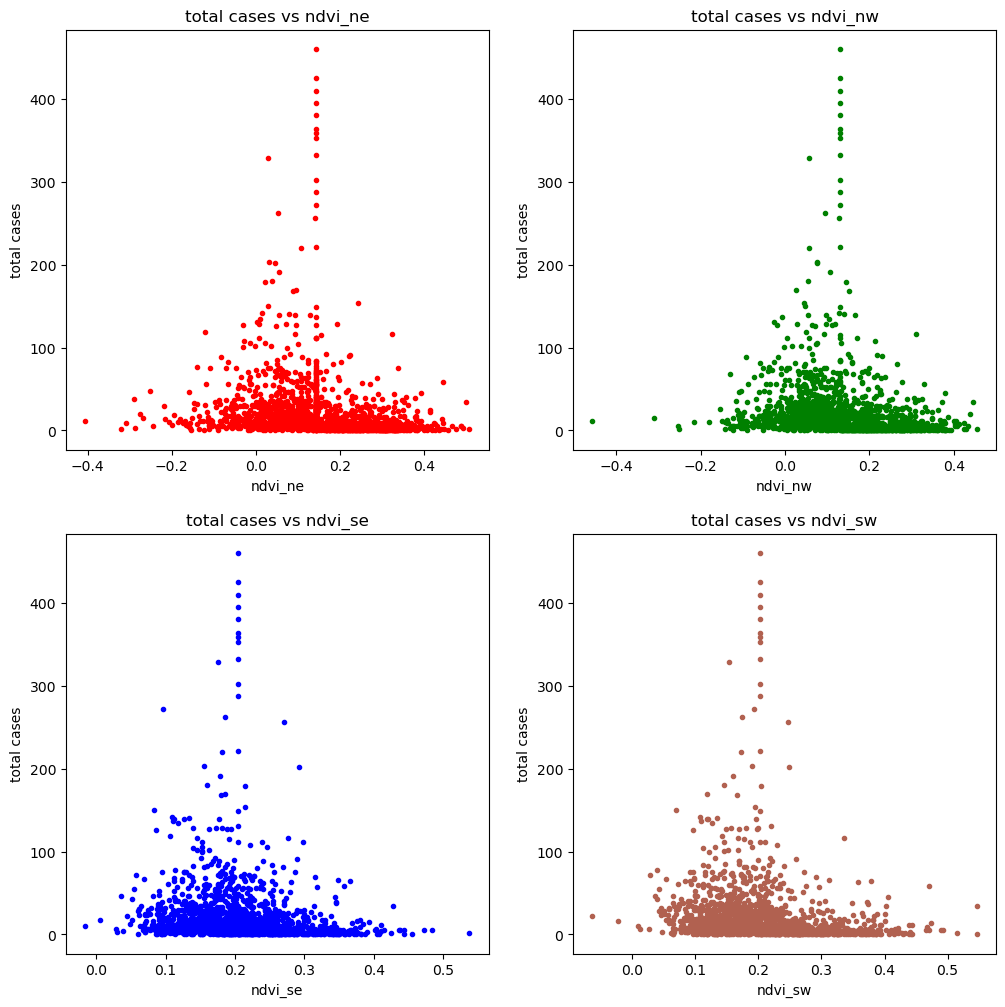

In [85]:
# ndvi_ne
plt.subplot(2, 2, 1)
plt.plot(dengue_features[x[0]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='red')
plt.xlabel(x[0])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[0])

# ndvi_nw
plt.subplot(2, 2, 2)
plt.plot(dengue_features[x[1]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='green')
plt.xlabel(x[1])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[1])

# ndvi_se
plt.subplot(2, 2, 3)
plt.plot(dengue_features[x[2]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='blue')
plt.xlabel(x[2])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[2])

# ndvi_sw
plt.subplot(2, 2, 4)
plt.plot(dengue_features[x[3]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='#B16150')
plt.xlabel(x[3])
plt.ylabel('total cases')
plt.title('total cases vs ' + x[3])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


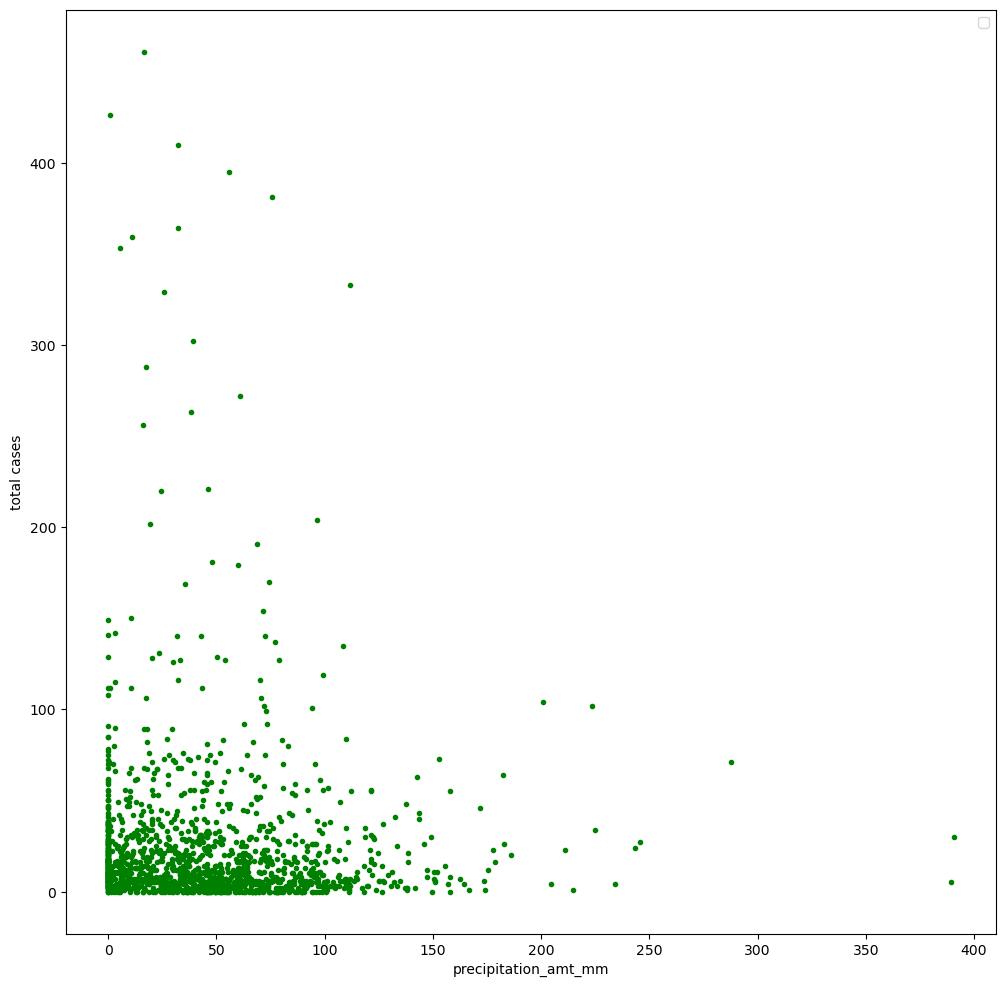

In [86]:
plt.plot(dengue_features[x[4]], dengue_features['total_cases'], 
         marker='.', linestyle='none', color='green')
plt.xlabel(x[4])
plt.ylabel('total cases')
plt.legend()
plt.show()

## Feature Engineering

### 3. The dengue cases of San Juan `sj`  and Iquitos `iq` are not dependent. So splitting them into different DataFrames

In [87]:
X_sj = dengue_features[dengue_features['city'] == 'sj']
X_iq = dengue_features[dengue_features['city'] == 'iq']

In [88]:
X_sj = X_sj.drop(['city', 'weekofyear', 'week_start_date'], axis=1)
X_iq = X_iq.drop(['city', 'weekofyear', 'week_start_date'], axis=1)

In [89]:
one_hot_sj = pd.get_dummies(X_sj['year'])
X_sj = X_sj.drop('year', axis=1)
X_sj = X_sj.join(one_hot_sj)

In [90]:
one_hot_iq = pd.get_dummies(X_iq['year'])
X_iq = X_iq.drop('year', axis=1)
X_iq = X_iq.join(one_hot_iq)

### 4. Changing the order of columns in X_sj and X_iq DataFrames

In [91]:
years = X_sj.columns[:23:-1].values.tolist()
X_sj = X_sj[years[::-1]].join(X_sj[X_sj.columns[:24]])
X_sj.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases,1990
0,False,False,False,False,False,False,False,False,False,False,...,2.629,25.443,6.900,29.4,20.0,16.0,24.70,24.70,4,True
1,False,False,False,False,False,False,False,False,False,False,...,2.371,26.714,6.371,31.7,22.2,8.6,26.95,25.50,5,True
2,False,False,False,False,False,False,False,False,False,False,...,2.300,26.714,6.486,32.2,22.8,41.4,27.50,25.75,4,True
3,False,False,False,False,False,False,False,False,False,False,...,2.429,27.471,6.771,33.3,23.3,4.0,28.30,26.05,3,True
4,False,False,False,False,False,False,False,False,False,False,...,3.014,28.943,9.371,35.0,23.9,5.8,29.45,26.55,6,True


In [92]:
years = X_iq.columns[:23:-1].values.tolist()
X_iq = X_iq[years[::-1]].join(X_iq[X_iq.columns[:24]])
X_iq.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases,2000
936,False,False,False,False,False,False,False,False,False,False,...,8.929,26.400,10.775,32.5,20.7,3.0,26.60,27.05,0,True
937,False,False,False,False,False,False,False,False,False,False,...,10.314,26.900,11.567,34.0,20.8,55.6,27.40,25.70,0,True
938,False,False,False,False,False,False,False,False,False,False,...,7.386,26.800,11.467,33.0,20.7,38.1,26.85,25.40,0,True
939,False,False,False,False,False,False,False,False,False,False,...,9.114,25.767,10.533,31.5,14.7,30.0,23.10,22.95,0,True
940,False,False,False,False,False,False,False,False,False,False,...,9.500,26.600,11.480,33.3,19.1,4.0,26.20,26.10,0,True


In [93]:
# Removing dummy variable trap
X_sj = X_sj.drop(1990, axis=1)
X_iq = X_iq.drop(2000, axis=1)

In [94]:
x_sj_arr = X_sj.iloc[:].values
x_iq_arr = X_iq.iloc[:].values

In [95]:
# np.random.seed(23)
np.random.shuffle(x_sj_arr)
np.random.shuffle(x_iq_arr)

### 5. Splitting the dataframes into train and test

In [96]:
from sklearn.model_selection import train_test_split

X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(x_sj_arr[:, :-1], x_sj_arr[:, -1], test_size=0.2)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(x_iq_arr[:, :-1], x_iq_arr[:, -1], test_size=0.2)

### 6. Applying Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

sj_scaler = StandardScaler()
X_sj_train = sj_scaler.fit_transform(X_sj_train)
X_sj_test = sj_scaler.transform(X_sj_test)

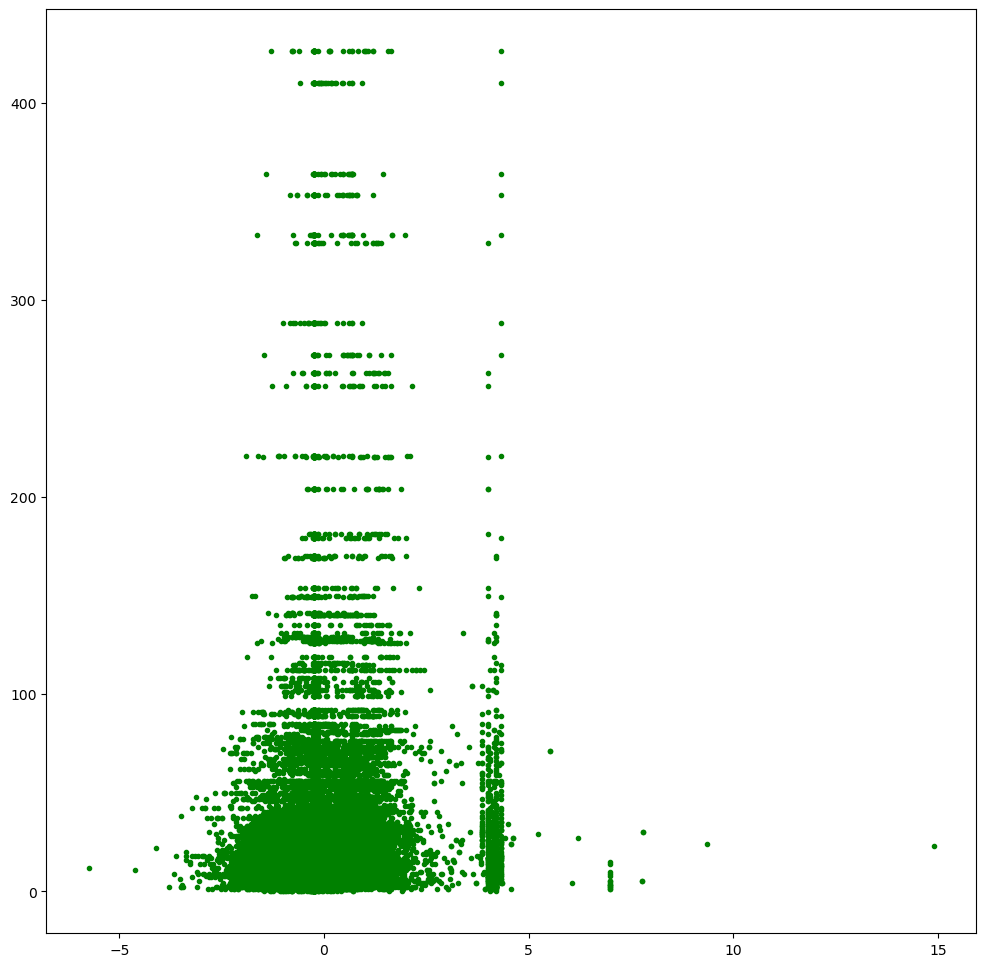

In [98]:
plt.plot(X_sj_train, y_sj_train, marker='.', color='green', linestyle='none')
plt.show()

### Time for modelling

In [99]:
from sklearn.neighbors import KNeighborsRegressor

sj_knn = KNeighborsRegressor(n_neighbors=5)

sj_knn.fit(X_sj_train, y_sj_train)

KNeighborsRegressor()

In [100]:
y_sj_pred = sj_knn.predict(X_sj_test)

In [101]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_sj_test, y_sj_pred))

21.23191489361702


In [102]:
iq_scaler = StandardScaler()
X_iq_train = iq_scaler.fit_transform(X_iq_train)
X_iq_test = iq_scaler.transform(X_iq_test)

In [103]:
iq_knn = KNeighborsRegressor(n_neighbors=5)

iq_knn.fit(X_iq_train, y_iq_train)

KNeighborsRegressor()

In [104]:
y_iq_pred = iq_knn.predict(X_iq_test)

In [105]:
print(mean_absolute_error(y_iq_test, y_iq_pred))

4.838461538461539


In [106]:
from sklearn.ensemble import RandomForestRegressor

sj_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
sj_ada.fit(X_sj_train, y_sj_train)

y_sj_pred = sj_ada.predict(X_sj_test)

mean_absolute_error(y_sj_test, y_sj_pred)

17.594789798563074

In [107]:
iq_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
iq_ada.fit(X_iq_train, y_iq_train)

y_iq_pred = iq_ada.predict(X_iq_test)

mean_absolute_error(y_iq_test, y_iq_pred)

5.990680371252617

### Tuning the hyperparameter

In [108]:
from sklearn.model_selection import GridSearchCV

knn_parameters = [{'algorithm':['ball_tree'], 'leaf_size':[25]},
                  {'algorithm':['kd_tree'], 'leaf_size':[25]},
                  {'algorithm':['brute']}]

sj_knn_grid_cv = GridSearchCV(estimator=sj_knn, param_grid=knn_parameters,
                              scoring='neg_mean_absolute_error', cv=5)

In [109]:
sj_knn_grid_cv = sj_knn_grid_cv.fit(X_sj_train, y_sj_train)

# sj_knn_grid_cv.predict(X_sj_test)

# mean_absolute_error(y_sj_test, sj_knn_grid_cv.predict(X_sj_test))
print(sj_knn_grid_cv.best_score_)
print(sj_knn_grid_cv.best_params_)

-18.840676510067112
{'algorithm': 'ball_tree', 'leaf_size': 25}
